## **load train, test dataset using Pandas**

In [267]:
import pandas as pd

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [268]:
print(type(train))
train.dtypes

<class 'pandas.core.frame.DataFrame'>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Exploratory data analysis**

In [244]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## **Data Dictionary**

* Survived: 0 = No, 1 = Yes
* pclass  : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp   : # of sibilings / spouses aboard the Titanic
* parch   : # of parents   / children aboard the Titanic
* ticket  : Ticket number
* cabin   : Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [25]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset

In [27]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [269]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that Age value is missing ofr manay rows.
Out of 891 rows, the Age value is present only in 714 rows
Similarly, Cabin values are also missing in many rows. 
Only 204 out of 891 rows have Cabin values.

In [246]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information

**Import python lib for visualization**

In [270]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## **Bar Chart for Categorical Features**
* Pclass
* Sex
* SibSp (# of siblings and spouse)
* Parch (# of parents and children)
* Embarked
* Cabin

In [271]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead     = train[train['Survived']==0][feature].value_counts()
    df       = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

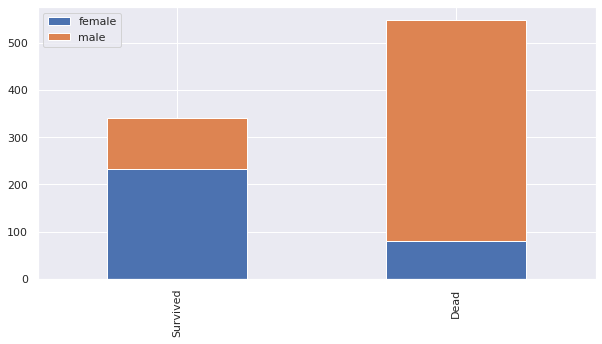

In [248]:
bar_chart('Sex')

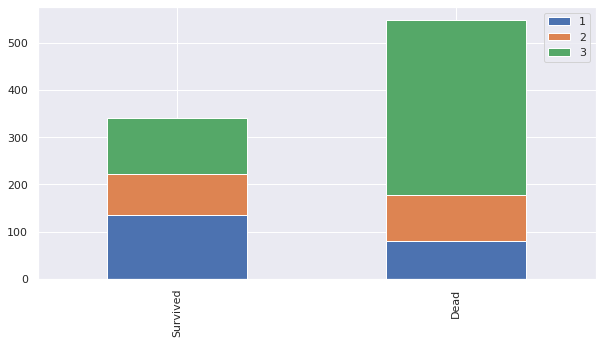

In [250]:
bar_chart('Pclass')

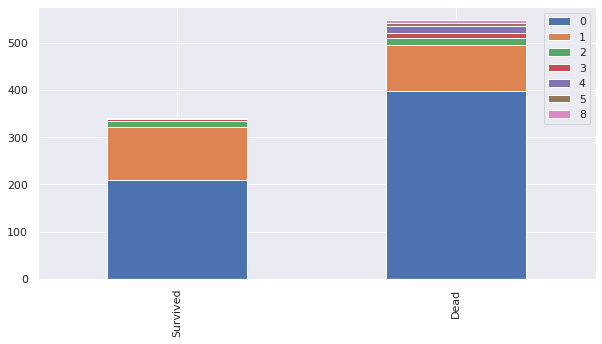

In [20]:
bar_chart('SibSp')

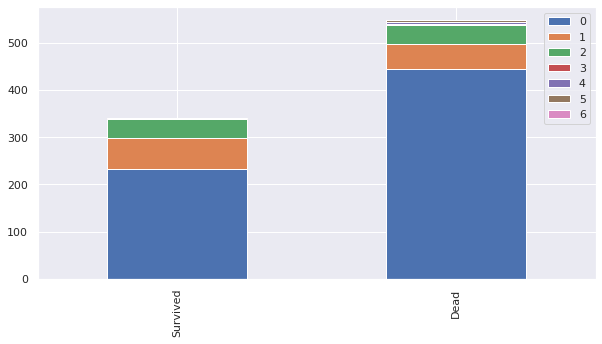

In [114]:
bar_chart('Parch')

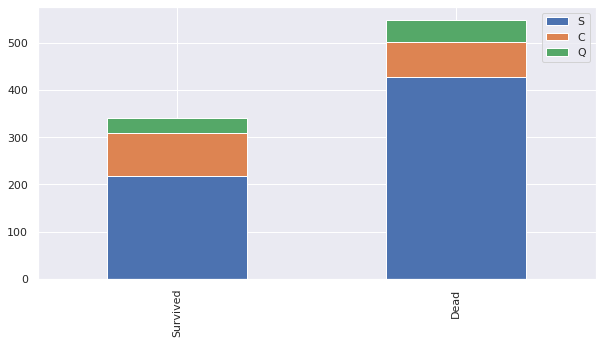

In [99]:
bar_chart('Embarked')

## **Feature enginerring** ##
Feature engineering is the process of using domain knowledge of the data
to create features (feature vectore) that make machine learing algorithms work.

feature vector is an n-dimensional vector of numberical features that represent some object.
Many algorithms in machine learning require a numberical representation of objects,
sine such representations facilitate processing and statistical analysis

In [251]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

## Name ##

In [272]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-za-z]+)\.', expand=False)

In [253]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Mme           1
Don           1
Countess      1
Capt          1
Sir           1
Ms            1
Name: Title, dtype: int64

In [273]:

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [255]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S    0.0  
1      0          PC 17599  71.2833   C85        C    2.0  
2      0  STON/O2. 3101282   7.9250   NaN        S    1.0  
3      0            113803  53.1000  C123        S    2.0  
4      0            373450   8.0500   NaN        S    0.0

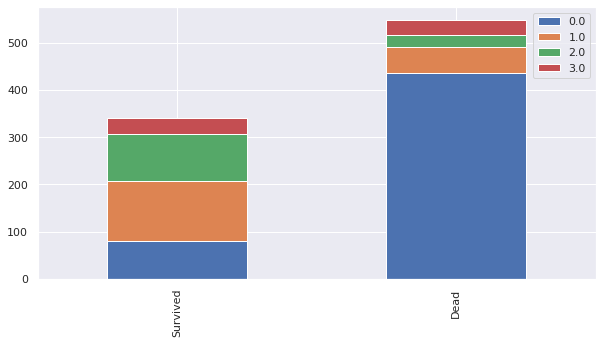

In [47]:
bar_chart('Title')

In [275]:
# delete unnecessary feature from dataset 
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [274]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

## Sex ##

male: 0, female: 1

In [276]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

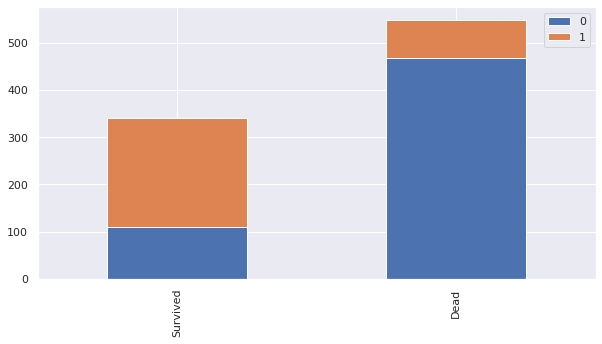

In [277]:
bar_chart('Sex')

## Age ##

**some age is missing**

Let's use Title's median age for missing Age

In [124]:
train.head(100)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.0      1      0         A/5 21171   
1             2         1       1    1  38.0      1      0          PC 17599   
2             3         1       3    1  26.0      0      0  STON/O2. 3101282   
3             4         1       1    1  35.0      1      0            113803   
4             5         0       3    0  35.0      0      0            373450   
..          ...       ...     ...  ...   ...    ...    ...               ...   
95           96         0       3    0   NaN      0      0            374910   
96           97         0       1    0  71.0      0      0          PC 17754   
97           98         1       1    0  23.0      0      1          PC 17759   
98           99         1       2    1  34.0      0      1            231919   
99          100         0       2    0  34.0      1      0            244367   

       Fare    Cabin Embarked  Title  
0    7.2500      NaN        S    0.0  
1   71.2833      C85        C    2.0  
2    7.9250      NaN        S    1.0  
3   53.1000     C123        S    2.0  
4    8.0500      NaN        S    0.0  
..      ...      ...      ...    ...  
95   8.0500      NaN        S    0.0  
96  34.6542       A5        C    0.0  
97  63.3583  D10 D12        C    0.0  
98  23.0000      NaN        S    2.0  
99  26.0000      NaN        S    0.0  

[100 rows x 12 columns]

In [278]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

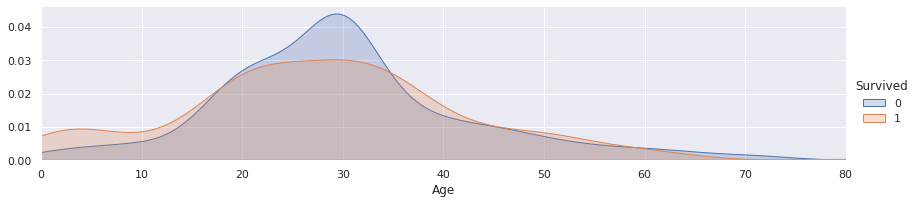

In [279]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

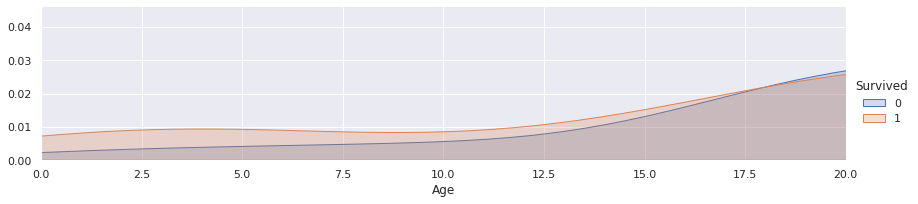

In [280]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

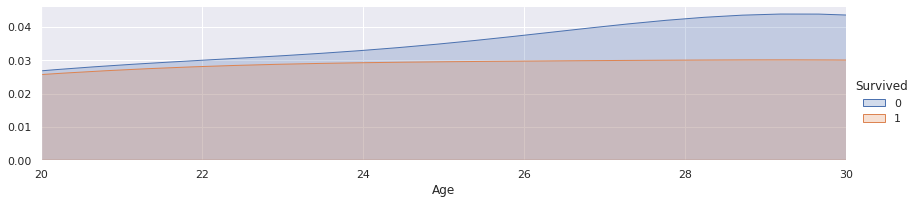

In [263]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

In [281]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Bining**

Binning/Converting Numerical Age to Catagorical Variable 

feature vector map:

child: 0

young: 1

adult: 2

mid-age: 3

senior: 4

In [282]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

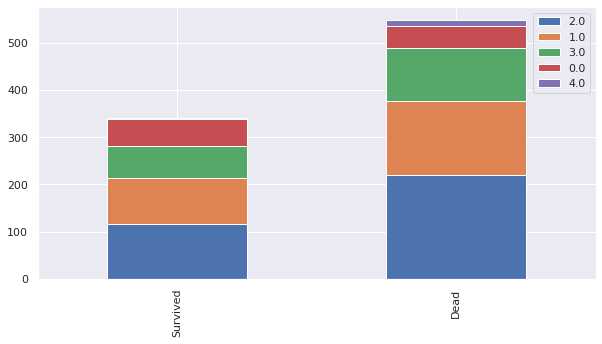

In [283]:
bar_chart('Age')

## Embarked ##

**filiing missing values**

<AxesSubplot:>

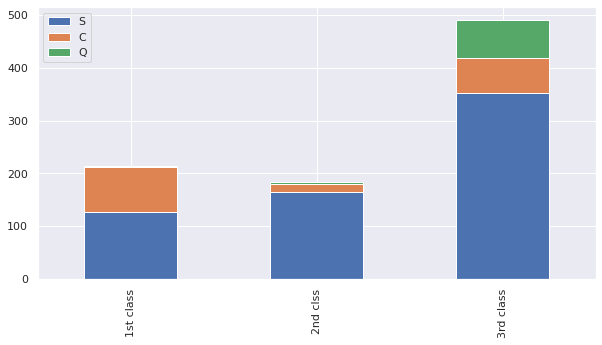

In [284]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd clss', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [285]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [157]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN         0    0.0  
1  71.2833   C85         1    2.0  
2   7.9250   NaN         0    1.0  
3  53.1000  C123         0    2.0  
4   8.0500   NaN         0    0.0

In [286]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare ##

In [287]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

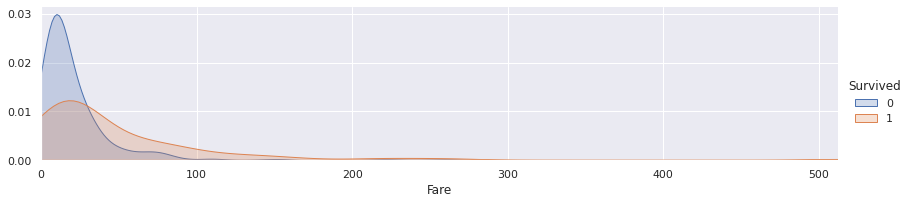

In [288]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

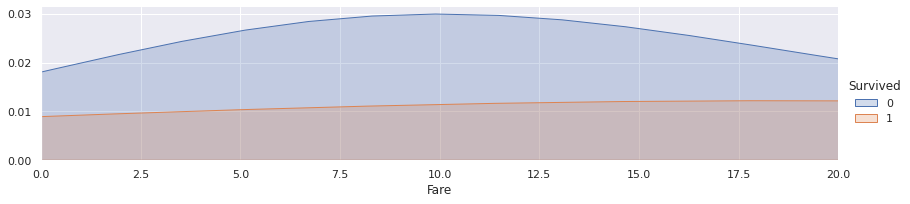

In [161]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [202]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [164]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0    0.0  
1   2.0   C85         1    2.0  
2   0.0   NaN         0    1.0  
3   2.0  C123         0    2.0  
4   0.0   NaN         0    0.0

## Cabin ##

In [289]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
              ..
C90            1
E38            1
A24            1
C110           1
E68            1
Name: Cabin, Length: 147, dtype: int64

In [290]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

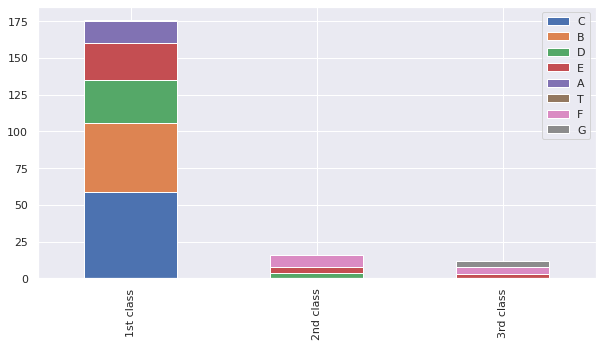

In [291]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [292]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [293]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


## FamilySize ##

In [295]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

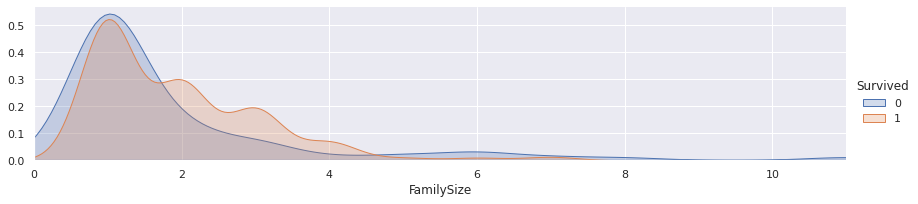

In [296]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [297]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [212]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0    0.0         0.4  
1   2.0    0.8         1    2.0         0.4  
2   0.0    2.0         0    1.0         0.0  
3   2.0    0.8         0    2.0         0.4  
4   0.0    2.0         0    0.0         0.0

In [298]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [299]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [233]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0    0.0         0.4
1       1    1  3.0   2.0    0.8         1    2.0         0.4
2       3    1  1.0   0.0    2.0         0    1.0         0.0
3       1    1  2.0   2.0    0.8         0    2.0         0.4
4       3    0  2.0   0.0    2.0         0    0.0         0.0
5       3    0  2.0   0.0    2.0         2    0.0         0.0
6       1    0  3.0   2.0    1.6         0    0.0         0.0
7       3    0  0.0   1.0    2.0         0    3.0         1.6
8       3    1  2.0   0.0    2.0         0    2.0         0.8
9       2    1  0.0   2.0    1.8         1    2.0         0.4

## Modelling ##

In [300]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## Cross Validation (K-fold) ##

In [302]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## kNN ##

In [303]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.74157303 0.7752809  0.69662921 0.76404494 0.74157303
 0.76404494 0.74157303 0.74157303 0.78651685]


In [304]:
# kNN score
round(np.mean(score) * 100, 2)

74.53

## Naive Bayes ##

In [305]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.74157303 0.7752809  0.75280899 0.74157303 0.83146067
 0.80898876 0.82022472 0.82022472 0.83146067]


In [306]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

79.46

## SVM ##

In [307]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66666667 0.75280899 0.69662921 0.59550562 0.75280899 0.69662921
 0.6741573  0.68539326 0.59550562 0.62921348]


In [308]:
round(np.mean(score)*100,2)

67.45

## Testing ##

In [312]:
clf = GaussianNB()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [313]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv', index=False)

In [314]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## References ##
This notebook is created by learning from the following notebooks:

https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689

https://www.ahmedbesbes.com/blog/kaggle-titanic-competition

https://olegleyz.github.io/titanic_factors.html

https://www.codeastar.com/data-wrangling/